# Analysis of Which factors can Affact Customer's Feedback of Online Food Service

## 1 Introduction
### 1.1 Background Information
Nowadays, ordering online food is a quick and convenient for people who are busy or lazy to cook. Many platforms appear and provide a way of enjoying food from nearest restuarants through delivery. As online food ordering becomes more and more popular, it is essential and needful for sellers from platforms to find their main and potential customers.
### 1.2 Dataset Description
The dataset contains information collected from an online food ordering platform over a period of time. It encompasses various attributes related to Occupation, Family Size, Feedback etc..

This dataset is from kaggle: https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset

In [3]:
data.frame(
Attributes = c("Age","Gender","Martial Status","Occupation", "Monthly Income","Educational Qualifications","Family Size","Latitude","Longitude","Pin Code","Output","Feedback"),
Description = c("Age of the customer","Gender of the customer","Marital status of the customer","Occupation of the customer","Monthly income of the customer","Educational qualifications of the customer","Number of individuals in the customer's family","Latitude of the customer's location","Longitude of the customer's location","Pin code of the customer's location","Current status of the order","Feedback provided by the customer after receiving the order")
)

Attributes,Description
<chr>,<chr>
Age,Age of the customer
Gender,Gender of the customer
Martial Status,Marital status of the customer
Occupation,Occupation of the customer
Monthly Income,Monthly income of the customer
Educational Qualifications,Educational qualifications of the customer
Family Size,Number of individuals in the customer's family
Latitude,Latitude of the customer's location
Longitude,Longitude of the customer's location


### 1.3 Project Question
The research question of my project is to find most relavant explanatory variables related to response variable, the feedback of customers, which will be helpful in finding potential customers in the future.
- Find a inference model of feedbak

## 2 Preliminary Results
### 2.1 Improting Dataset

In [20]:
install.packages("cowplot", lib = '/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3')
install.packages("moderndive", lib = '/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3')
install.packages("leaps", lib = '/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3')

In [21]:
library(tidyverse)
library(repr)
library(ggplot2)
library(cowplot)
library(moderndive)
library(broom)
library(infer)
library(GGally)
library(leaps)

In [81]:
data <- read.csv("onlinefoods.csv") |> select(-X)
data$Gender <- as.factor(data$Gender)
data$Marital.Status <- as.factor(data$Marital.Status)
data$Occupation <- as.factor(data$Occupation)
data$Monthly.Income <- as.factor(data$Monthly.Income)
data$Educational.Qualifications <- as.factor(data$Educational.Qualifications)
data$Output <- as.factor(data$Output)
data$Feedback <- as.factor(data$Feedback)
head(data)

,Age,Gender,Marital.Status,Occupation,Monthly.Income,Educational.Qualifications,Family.size,latitude,longitude,Pin.code,Output,Feedback
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>
1,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
2,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
3,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
4,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
5,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
6,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive


### 2.2 Explortary Data Analysis
For explortary data analysis, I want to find the most relavant explantory variable related to the response variable, the feedback of online food by customers. 
- By the histogram of age, customers age between 20 and 25 seems to more likely to order online food.
- By the bar chart of gender, number of customers of different genders are mostly equal.
- By the bar chart of martial status, people who are single are more likely to order online food.
- By the bar chart of occupation, students are more likely to order online food.
- By the bar chart of monthly income, people with low income prefer to order online food.
- By the bar chart of education qualification, graduates and post graduates are more likely to order online food.
- By the bar chart of output, more customers have order with current status yes.
- By the bar chart of feedback, more people have positive experience when order online food.

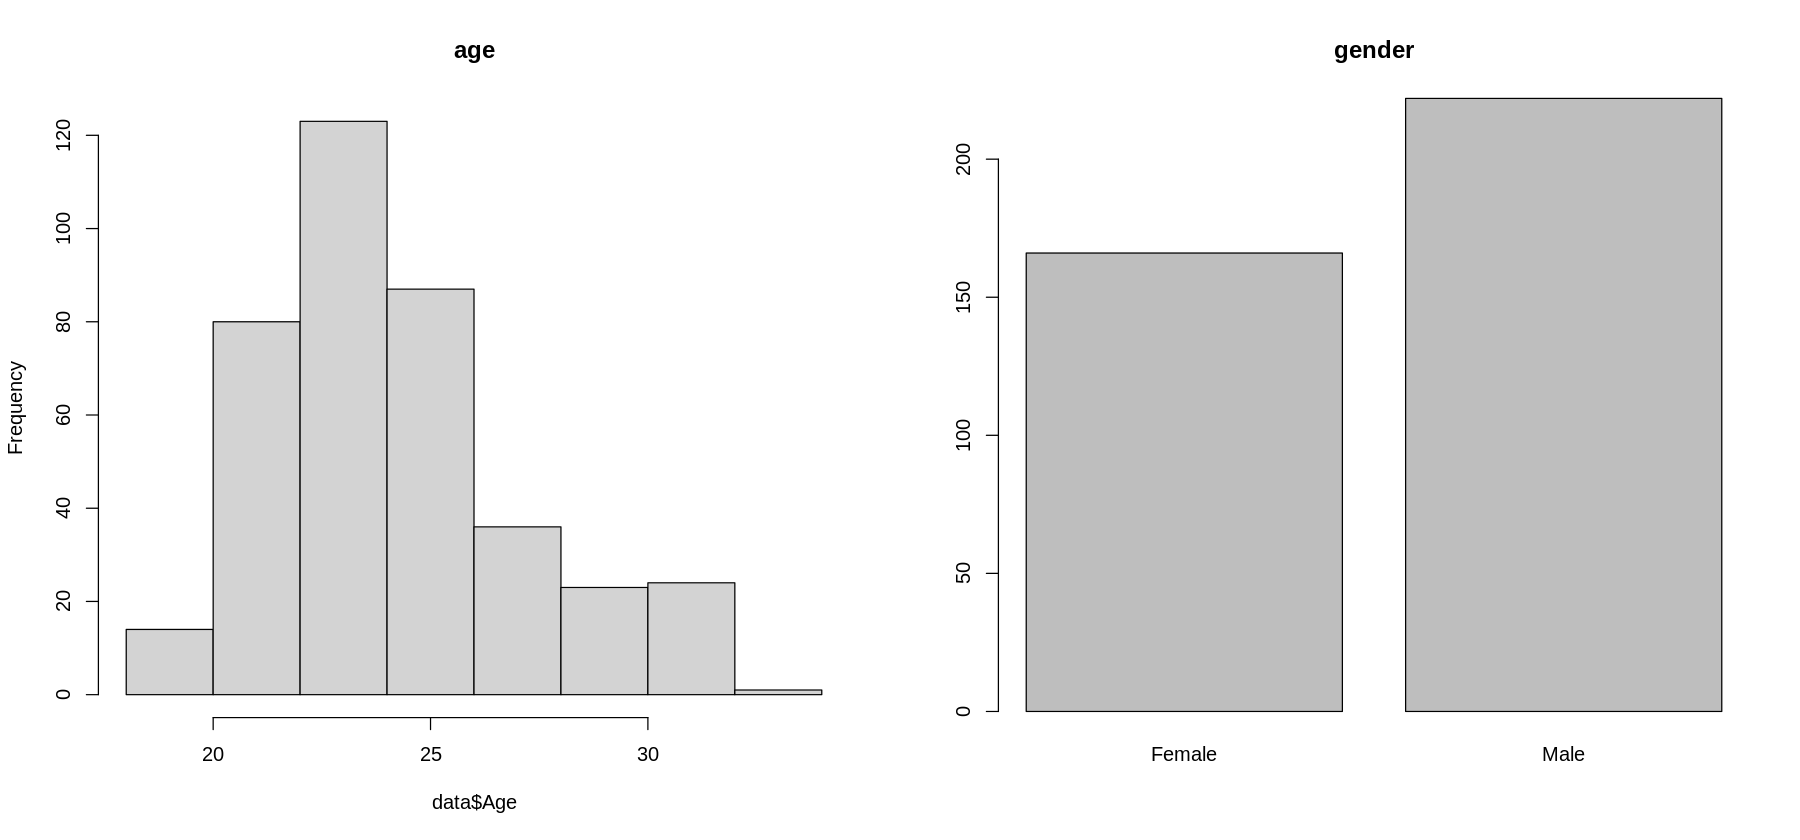

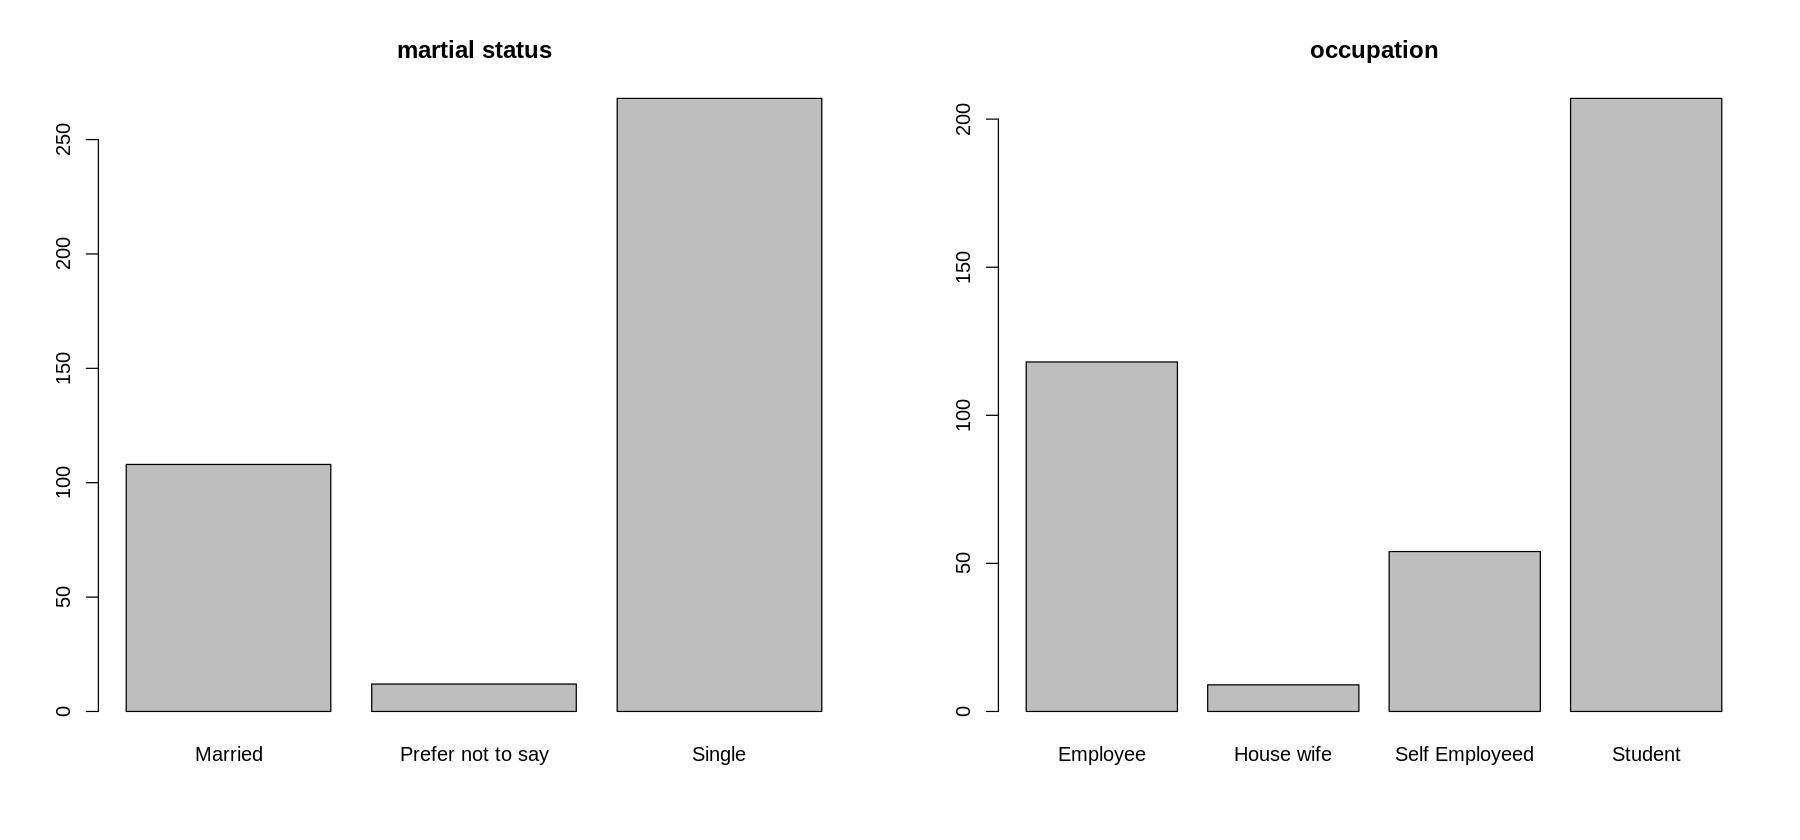

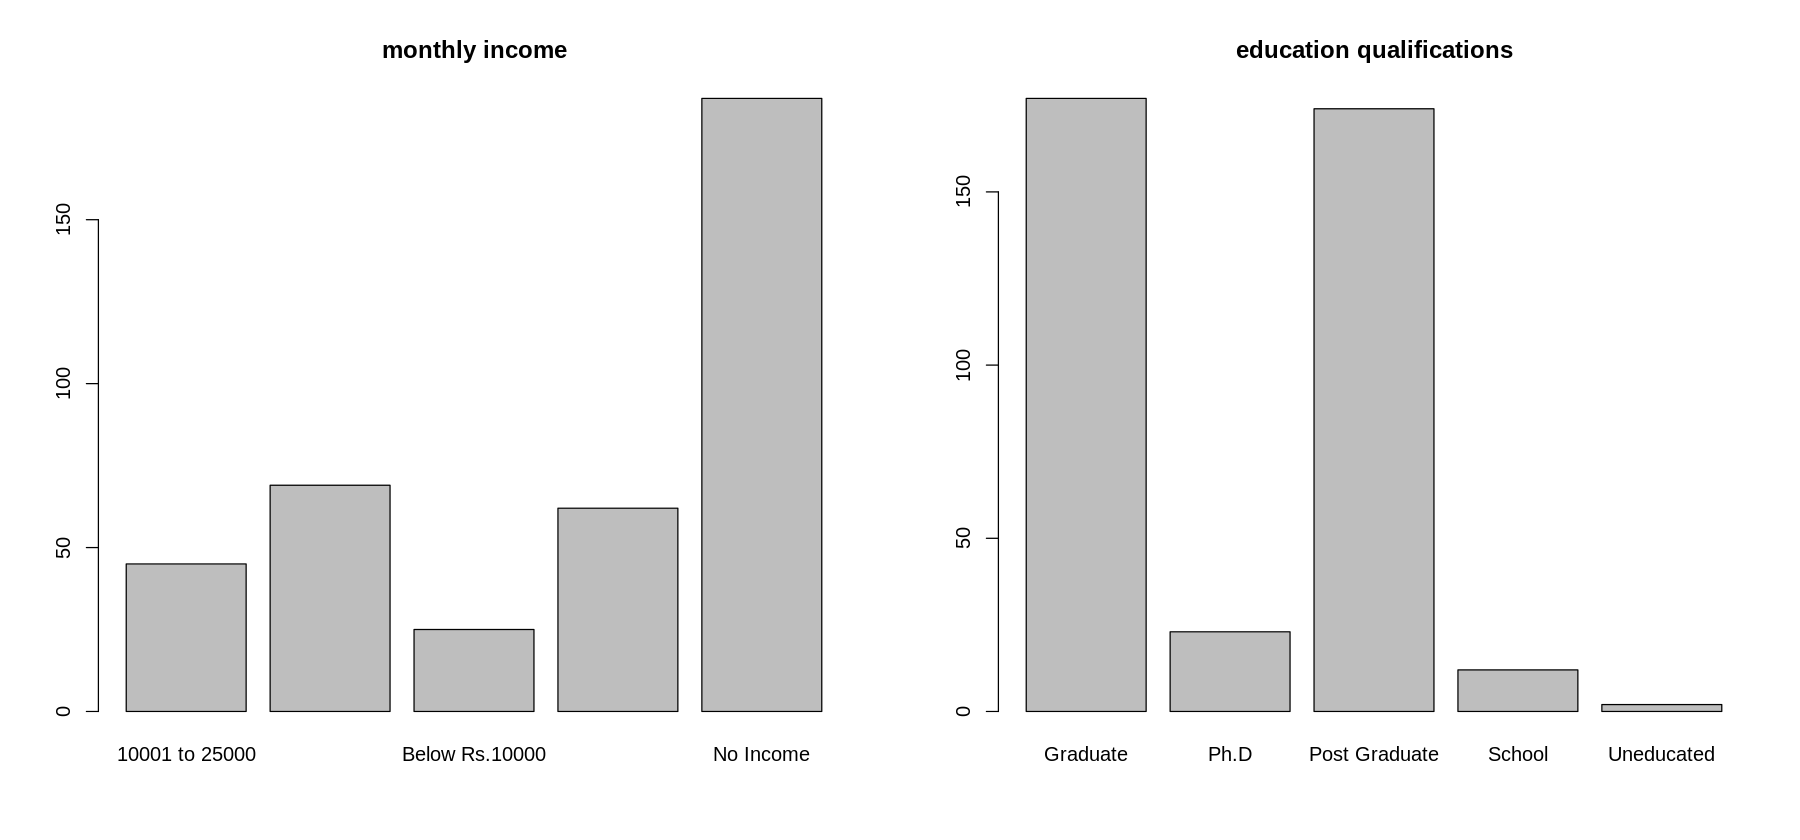

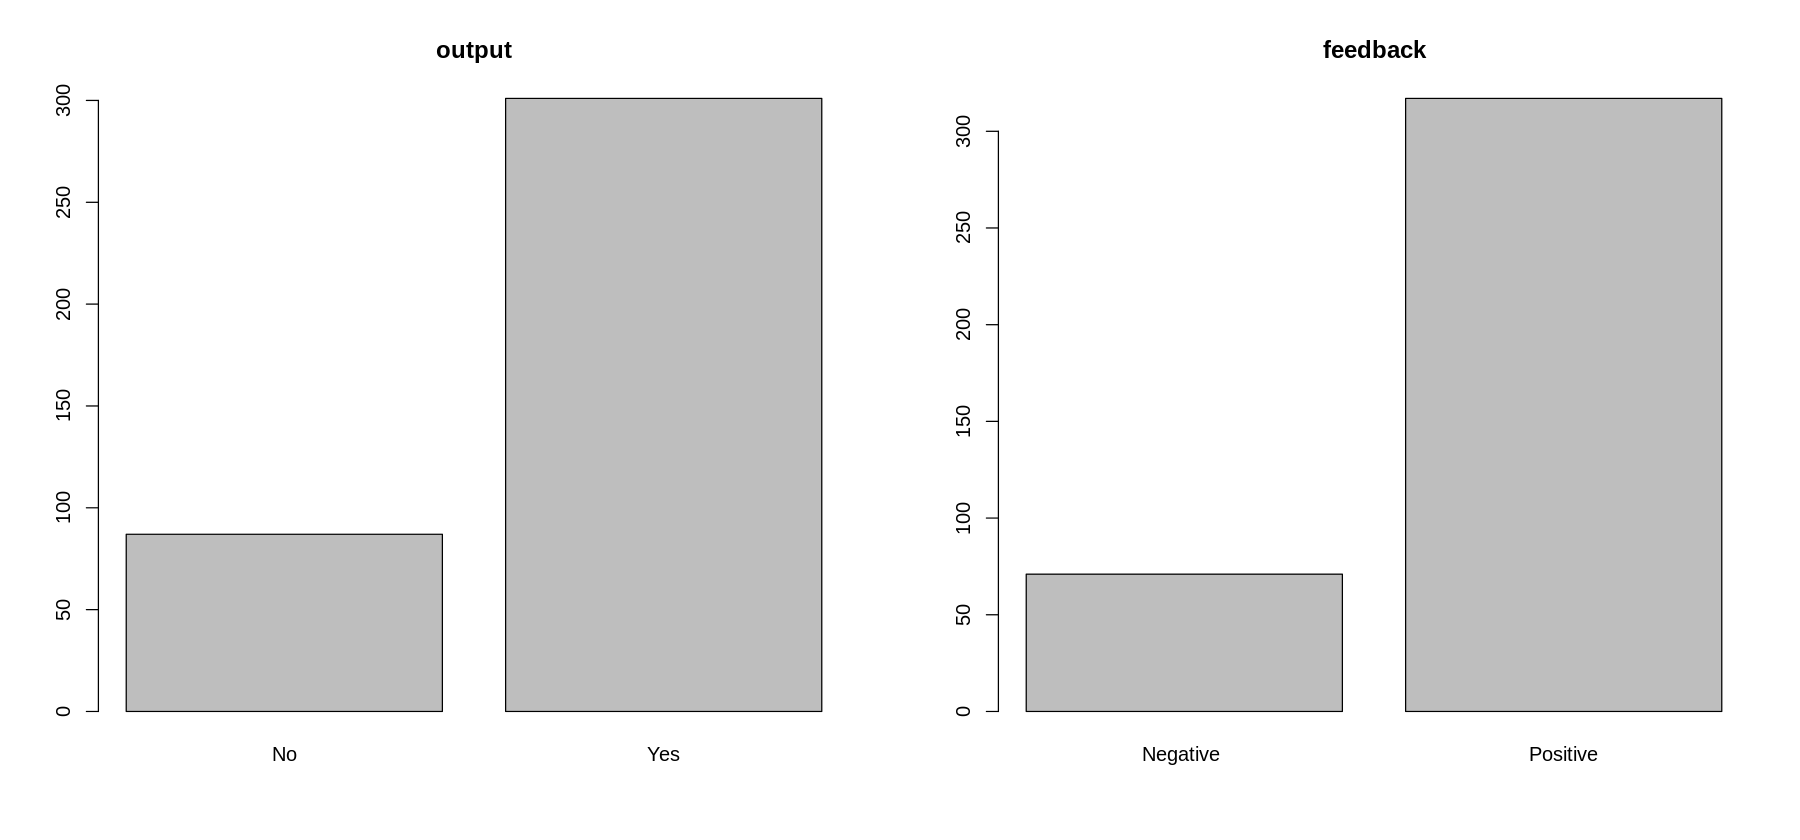

In [74]:
par(mfrow = c(1,2))
options(repr.plot.width=15)
hist(data$Age, main = "age")
plot(data$Gender, main = "gender")
plot(data$Marital.Status, main = "martial status")
plot(data$Occupation, main = "occupation")
plot(data$Monthly.Income, main = "monthly income")
plot(data$Educational.Qualifications, main = "education qualifications")
plot(data$Output, main = "output")
plot(data$Feedback, main = "feedback")

### 2.3 Parameters Selection and Comparison
Using function "regsubsets()", we can find best number of parameters to build a inference model by comparing the value of mallow's cp. In general, with smaller mallow's cp value, better the model fit.

In [75]:
data$Marital.Status <- as.numeric(data$Marital.Status)
data$Occupation <- as.numeric(data$Occupation)
data$Monthly.Income <- as.numeric(data$Monthly.Income)
data$Educational.Qualifications <- as.numeric(data$Educational.Qualifications)
head(data)

,Age,Gender,Marital.Status,Occupation,Monthly.Income,Educational.Qualifications,Family.size,latitude,longitude,Pin.code,Output,Feedback
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>
1,20,Female,3,4,5,3,4,12.9766,77.5993,560001,Yes,Positive
2,24,Female,3,4,3,1,3,12.9770,77.5773,560009,Yes,Positive
3,22,Male,3,4,3,3,3,12.9551,77.6593,560017,Yes,Negative
4,22,Female,3,4,5,1,6,12.9473,77.5616,560019,Yes,Positive
5,22,Male,3,4,3,3,4,12.9850,77.5533,560010,Yes,Positive
6,27,Female,1,1,4,3,2,12.9299,77.6848,560103,Yes,Positive


Some of the categorical variables are change to distinct numerical variables, which may be helpful in building the inference model.
- For marital status, 1 is married, 2 is prefer not to say, and 3 is single.
- For occupation, 1 is employee, 2 is house wife, 3 is self emplyeed, and 4 is student.
- For monthly income, 1 is 10001 to 25000, 2 is 25001 to 50000, 3 is below 10000, 4 is more than 50000, and 5 is no income.
- For education qualifications, 1 is graduate, 2 is Ph.D, 3 is post graduate, 4 is school, and 5 is uneducated.

I will use regsubsets function to find the most appropriate number of parameters to build the inference model. Then by comparing the value of mallow's cp, explanatory variables with lowest mallow's cp will be selected to build the inference moderl.

In [40]:
data_sel <- regsubsets(Feedback~.,data = data, method = "forward")
summary(data_sel)

Subset selection object
Call: regsubsets.formula(Feedback ~ ., data = data, method = "forward")
11 Variables  (and intercept)
                           Forced in Forced out
Age                            FALSE      FALSE
GenderMale                     FALSE      FALSE
Marital.Status                 FALSE      FALSE
Occupation                     FALSE      FALSE
Monthly.Income                 FALSE      FALSE
Educational.Qualifications     FALSE      FALSE
Family.size                    FALSE      FALSE
latitude                       FALSE      FALSE
longitude                      FALSE      FALSE
Pin.code                       FALSE      FALSE
OutputYes                      FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         Age GenderMale Marital.Status Occupation Monthly.Income
1  ( 1 ) " " " "        " "            " "        " "           
2  ( 1 ) " " " "        " "            " "        "*"           
3  ( 1 ) " " "*"        " "            " " 

In [41]:
cp_min = which.min(summary(data_sel)$cp) 
selected_var <- names(coef(data_sel, cp_min))[-1]
selected_var

[1] "GenderMale"     "Monthly.Income" "OutputYes"

By using regsubsets function and comparing the value of mallow's cp, we can see that model with 3 parameters are the best for building the inference model of feedback. These three parameters are "gender", "monthly income", and "output".

## 3 Methods and Plan
In this individual assignment, it is supposed to find the relationship between feedback and other explanatory variables, and then build a inference model. As above, I propose to use logistic regression to build a model since response variable is binary. Furthermore, hypothesis test will be applied to test whether these three variables are relavant to feedback.
### 3.1 Hypothesis Test
model: logit(feedback)=$\beta_0$+$\beta_1$*gender+$\beta_2$*monthly income+$\beta_3$*output

$H_0$ : $\beta_1=\beta_2=\beta_3=0$

$H_A$ : either one of $\beta_0,\beta_1,\beta_3\neq 0$

As well, a 95% confidence interval will be built for each variable.

**significance level**

The significance level is epected to be 0.05.

**epected to find**
* it is epected to fail in rejecting null hypothesis, which means that feedback of customers are not related to other factors.
### 3.2 Logistic regression

In [83]:
data <- read.csv("onlinefoods.csv") |> select(-X)
data$Gender <- as.factor(data$Gender)
data$Monthly.Income <- as.factor(data$Monthly.Income)
data$Output <- as.factor(data$Output)
data$Feedback <- ifelse(data$Feedback == "Positive", 1,0)
r <- glm(Feedback~Gender+Monthly.Income+Output, data = data, family = binomial)
summary(r)


Call:
glm(formula = Feedback ~ Gender + Monthly.Income + Output, family = binomial, 
    data = data)

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                    -0.2420     0.5037  -0.480   0.6309    
GenderMale                     -0.5753     0.3591  -1.602   0.1092    
Monthly.Income25001 to 50000   -0.2056     0.5693  -0.361   0.7180    
Monthly.IncomeBelow Rs.10000   -1.7898     0.6881  -2.601   0.0093 ** 
Monthly.IncomeMore than 50000   0.4101     0.6115   0.671   0.5024    
Monthly.IncomeNo Income         0.5859     0.5502   1.065   0.2870    
OutputYes                       3.3539     0.3702   9.059   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 369.30  on 387  degrees of freedom
Residual deviance: 233.01  on 381  degrees of freedom
AIC: 247.01

Number of Fisher Scoring iterations: 6


By the logistic regression, we can find following model:
* feedback = $\frac{1}{1+e^{-(-0.2420-0.5753*GenderMale-0.2056*Monthly.Income25001 to 50000-1.7898*Monthly.IncomeBelow Rs.10000+0.4101*Monthly.IncomeMore than 50000+0.5859*Monthly.IncomeNo Income +3.3539*OutputYes})}$
### 3.3 Implementation of Logistic Model

In [87]:
tidy(r, conf.int = TRUE, conf.level = 0.95, exponentiate = TRUE) %>%
    mutate(reject.H0 = ifelse(p.value <= 0.05, TRUE, FALSE))

term,estimate,std.error,statistic,p.value,conf.low,conf.high,reject.H0
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),0.7850829,0.5036581,-0.4804172,6.309307e-01,0.29107966,2.136446,FALSE
GenderMale,0.5625275,0.3591274,-1.6019810,1.091598e-01,0.27317544,1.123758,FALSE
Monthly.Income25001 to 50000,0.8141470,0.5693039,-0.3611681,7.179738e-01,0.26215290,2.473613,FALSE
Monthly.IncomeBelow Rs.10000,0.1669891,0.6881292,-2.6010037,9.295145e-03,0.04227792,0.635966,TRUE
Monthly.IncomeMore than 50000,1.5070257,0.6115085,0.6706987,5.024125e-01,0.45181832,5.035920,FALSE
Monthly.IncomeNo Income,1.7966281,0.5502473,1.0648151,2.869596e-01,0.59851163,5.236733,FALSE
OutputYes,28.6131301,0.3702064,9.0594485,1.311118e-19,14.26382995,61.350325,TRUE


By calculating p-values and 95% confidence interval, it is obvious that only if a person with monthly income below 10000 or the status of the food delivery is yes has significant probability that will give a positive feedback (only the p-values of monthly income below 10000 and output yes are lower than significance level 0.05).

## 4 Results and Discussion
### 4.1 Conclusion
In conclusion, people with monthly income below 10000 and current online food status yes, are more willing to give a positive feedback of their online food order service. In contrast, other factors, such as gender and marital status, has little influency on customers' willingness of feedback. 
### 4.2 Limitations
There are some limitations of this research project as well. First of all, it is suggested to calculate correlation between response variable and explanatory variables, which can provides more evidence in selecting parameters in building inference model. Secondly, this dataset only contains information of customers who have ordered online food from platforms, lacks information of ordering food in other ways, for example, throgh phone calling. At last, logistic regression may not be the most suitable model for inference, other regression model, such as LASSO, might provide different solution.
### 4.3 Discussion
There may be more factors which influences the feedback of online food order service, which are not contained in this dataset. For future research, it is possible to find a more convincing inference model of customers' feedback. Furthermore, it is also attractive to find which factors affect people whether or not to order food online.